In [11]:
#Необходимые библиотеки
import csv
import random
from datetime import datetime
from tkinter import *
from tkinter import ttk
from matplotlib.figure import Figure
from matplotlib.backends.backend_tkagg import (FigureCanvasTkAgg, NavigationToolbar2Tk)
import matplotlib.pyplot as plt

In [12]:
#Класс для хранения информации
class product:
    def __init__(self, information_string=''):
        data = self.informationFormat(information_string)
        
        if data:
            self.is_correct = True
            self.order_number = data[0]
            self.order_date = data[1]
            self.item_name = data[2]
            self.item_category = data[3]
            self.sales_number = data[4]
            self.item_price = data[5]
            self.total_cost = data[6]
        else:
            self.is_correct = False
            self.order_number = 0
            self.order_date = datetime.today()
            self.item_name = ''
            self.item_category = ''
            self.sales_number = 0
            self.item_price = 0
            self.total_cost = 0

    
    def informationFormat(self, information_string):
        information_list = information_string.split(';')
        formatted_data = []

        if len(information_list) != 7:
            return False

        #orderNumber
        if not information_list[0].isdigit():
            return False
        else:
            formatted_data.append(int(information_list[0]))

        #orderDate
        try:
            formatted_data.append(datetime.strptime(information_list[1], '%Y-%m-%d'))
        except ValueError:
            return False

        #itemName
        formatted_data.append(information_list[2])

        #itemCategory
        formatted_data.append(information_list[3])

        #salesNumber
        try:
            formatted_data.append(int(information_list[4]))
        except ValueError:
            return False

        #itemPrice
        try:
            formatted_data.append(float(information_list[5]))
        except ValueError:
            return False

        #totalCost
        try:
            formatted_data.append(float(information_list[6]))
        except ValueError:
            return False
            
        return formatted_data

    def get_order_number(self):
        return self.order_number
    def get_order_date(self):
        return self.order_date
    def get_item_name(self):
        return self.item_name
    def get_item_category(self):
        return self.item_category
    def get_sales_number(self):
        return self.sales_number
    def get_item_price(self):
        return self.item_price
    def get_total_cost(self):
        return self.total_cost
    def get_correctness(self):
        return self.is_correct

In [13]:
#Ввод товаров из файла
product_list = []
product_dictionary = {}
product_amount = {}

flag = False
with open('Product_names.csv', newline='') as csvfile:
    spamreader = csv.reader(csvfile, delimiter=' ', quotechar='|')
    for row in spamreader:
        item = product(row[0])
        if item.get_correctness():
            product_list.append(item)
            if item.get_item_name() in product_dictionary:
                product_dictionary[item.get_item_name()].append(item)
                product_amount[item.get_item_name()] += item.get_sales_number()
            else:
                product_dictionary[item.get_item_name()] = [item]
                product_amount[item.get_item_name()] = item.get_sales_number()
        else:
            print('wrong format of data')

wrong format of data


In [14]:
#Поиск самого ходового товара
def most_popular_product(dictionary):
    current_dictionary = {}
    for i in dictionary:
        for item in dictionary[i]:
            if item.get_item_name() in current_dictionary:
                current_dictionary[item.get_item_name()] += item.get_sales_number()
            else:
                current_dictionary[item.get_item_name()] = item.get_sales_number()
    max_number = 0
    max_name = ''
    for i in current_dictionary:
        if current_dictionary[i] > max_number:
            max_number = current_dictionary[i]
            max_name = i
    return (max_name, max_number)

In [15]:
#Поиск самого прибыльного товара
def most_profitable_product(dictionary):
    current_dictionary = {}
    for i in dictionary:
        for item in dictionary[i]:
            if item.get_item_name() in current_dictionary:
                current_dictionary[item.get_item_name()] += item.get_total_cost()
            else:
                current_dictionary[item.get_item_name()] = item.get_total_cost()
    max_cost = 0
    max_name = ''
    for i in current_dictionary:
        if current_dictionary[i] > max_cost:
            max_cost = current_dictionary[i]
            max_name = i
    return (max_name, max_cost)

In [16]:
#Суммарная прибыть
def total_income():
    total_income_value = 0
    for i in product_list:
        total_income_value += i.get_total_cost()
    return total_income_value

In [17]:
#Сортировка массива
def quickSort(nums):
   if len(nums) <= 1:
       return nums
   else:
       q = random.choice(nums)
       s_nums = []
       m_nums = []
       e_nums = []
       for n in nums:
           if n[0] < q[0]:
               s_nums.append(n)
           elif n[0] > q[0]:
               m_nums.append(n)
           else:
               e_nums.append(n)
       return quickSort(s_nums) + e_nums + quickSort(m_nums)
product_sorted = []
for i in product_amount:
    product_sorted.append((product_amount[i], i))
product_sorted = quickSort(product_sorted)

(-1.25, 1.25, -1.25, 1.25)

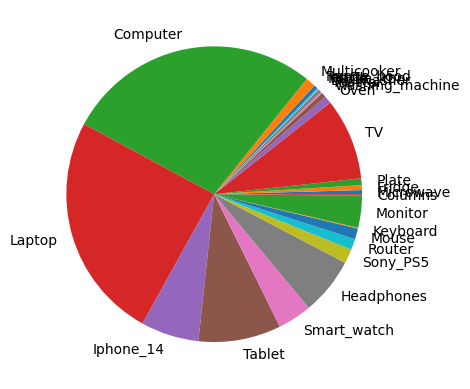

In [18]:
#Доля каждого товара в общей выручке
values = []
labels = []
total_income_value = total_income()
for i in product_amount:
    labels.append(i)
    val = product_amount[i] * product_dictionary[i][0].get_item_price()
    values.append(val / total_income_value * 100)
fig, ax = plt.subplots()
ax.pie(values, labels=labels)
ax.axis()

In [19]:
#Вывод данных в консоль
if len(product_list):
    print("Итоговая выручка", total_income())
    print("Самый ходовой товар", most_popular_product(product_dictionary))
    print("Самый прибыльный товар", most_profitable_product(product_dictionary))
    for i in product_amount:
        print(i, "был продан", product_amount[i], "раз")

Итоговая выручка 236641000.0
Самый ходовой товар ('Computer', 120000)
Самый прибыльный товар ('Computer', 72000000.0)
Microwave был продан 5000 раз
Fridge был продан 20000 раз
Plate был продан 7000 раз
TV был продан 100000 раз
Oven был продан 27000 раз
Washing_machine был продан 15000 раз
Toaster был продан 3000 раз
Dishwasher был продан 17000 раз
Waffle_iron был продан 2500 раз
Kettle был продан 1300 раз
Range_hood был продан 13000 раз
Multicooker был продан 7000 раз
Computer был продан 120000 раз
Laptop был продан 90000 раз
Iphone_14 был продан 70000 раз
Tablet был продан 79000 раз
Smart_watch был продан 30000 раз
Headphones был продан 15000 раз
Sony_PS5 был продан 50000 раз
Router был продан 8000 раз
Mouse был продан 3300 раз
Keyboard был продан 6000 раз
Monitor был продан 30000 раз
Columns был продан 1500 раз


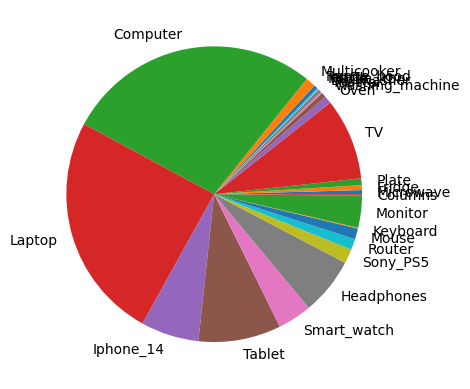

In [14]:
rootWindow = Tk()
rootWindow.title('Курсовая работа')
rootWindow.geometry("300x250+500+500")
rootWindow.resizable(False, False)



#info part
def info_button_click():
    informationWindow = Toplevel(rootWindow)
    informationWindow.title('')
    informationWindow.geometry("270x170+515+500")
    label1 = ttk.Label(informationWindow, text="Курсовая работа")
    label2 = ttk.Label(informationWindow, text="Выполнил\nФирсов Денис Сергеевич\nгруппа БФИ2204")
    label1.pack()
    label2.pack()

info_button = ttk.Button(text="info", width = 0, command=info_button_click)
info_button.grid(row=10, column=0, padx=4, pady=4)

#общая выручка
def total_income_button_click():
    total_income_window = Toplevel(rootWindow)
    total_income_window.title('суммарная выручка')
    total_income_window.geometry("270x170+515+500")
    label1 = ttk.Label(total_income_window, text=f"Итоговая выручка составила")
    label2 = ttk.Label(total_income_window, text=f"{total_income()} рублей")
    label1.pack()
    label2.pack()

total_income_label = ttk.Label(text="Суммарная выручка", width = 0)
total_income_button = ttk.Button(text="открыть", width = 0, command=total_income_button_click)
total_income_label.grid(column = 0, row = 1)
total_income_button.grid(column = 1, row = 1)



#Самый продаваемый товар

def the_most_popular_class_button_click():
    most_popular_class_window = Toplevel(rootWindow)
    most_popular_class_window.title('самый популярный товар')
    most_popular_class_window.geometry("270x170+515+500")
    k = most_popular_product(product_dictionary)
    label1 = ttk.Label(most_popular_class_window, text="Самым популярным товаром оказался")
    label2 = ttk.Label(most_popular_class_window, text=f"{k[0]}")
    label3 = ttk.Label(most_popular_class_window, text="Его купили")
    label4 = ttk.Label(most_popular_class_window, text=f"{k[1]} раз")
    label1.pack()
    label2.pack()
    label3.pack()
    label4.pack()

most_popular_class_label = ttk.Label(text="Самый популярный товар", width = 0)
most_popular_class_button = ttk.Button(text="открыть", width = 0, command=the_most_popular_class_button_click)
most_popular_class_label.grid(column = 0, row = 2)
most_popular_class_button.grid(column = 1, row = 2)




#Самый прибыльный товар

def profitable_product_button_click():
    most_Profitable_product_window = Toplevel(rootWindow)
    most_Profitable_product_window.title('самый прибыльный товар')
    most_Profitable_product_window.geometry("270x170+515+500")
    k = most_profitable_product(product_dictionary)
    label1 = ttk.Label(most_Profitable_product_window, text="Самым прибыльным товаром оказался")
    label2 = ttk.Label(most_Profitable_product_window, text=f"{k[0]}")
    label3 = ttk.Label(most_Profitable_product_window, text="он принес")
    label4 = ttk.Label(most_Profitable_product_window, text=f"{k[1]} рублей")
    label1.pack()
    label2.pack()
    label3.pack()
    label4.pack()

most_profitable_product_label = ttk.Label(text="Самый прибыльный товар", width = 0)
most_profitable_product_button = ttk.Button(text="открыть", width = 0, command=profitable_product_button_click)
most_profitable_product_label.grid(column = 0, row = 3)
most_profitable_product_button.grid(column = 1, row = 3)

#Финальный отчет
def final_report_button_click():
    final_report_window = Toplevel(rootWindow)
    final_report_window.title('итоговый отчет')
    
    label1 = ttk.Label(final_report_window, text=f"Итоговая выручка составила")
    label2 = ttk.Label(final_report_window, text=f"{total_income()} рублей")
    label1.pack()
    label2.pack()
    
    global values
    global labels
    fig, ax = plt.subplots()
    ax.pie(values, labels=labels)
    canvas = FigureCanvasTkAgg(fig, master = final_report_window)
    canvas.draw()
    canvas.get_tk_widget().pack()

    listbox = Listbox(final_report_window)
    listbox.pack(side=LEFT, fill=BOTH, expand=1)
    for i in product_sorted:
        listbox.insert(END, (i[1] + " был продан " + str(i[0]) + " раз"))

    scrollbar = ttk.Scrollbar(final_report_window, orient="vertical", command=listbox.yview)
    scrollbar.pack(side=RIGHT, fill=Y)

    listbox["yscrollcommand"]=scrollbar.set

final_report_label = ttk.Label(text="Итоговый отчет", width = 0)
final_report_button = ttk.Button(text="открыть", width = 0, command=final_report_button_click)
final_report_label.grid(column = 0, row = 4)
final_report_button.grid(column = 1, row = 4)
rootWindow.mainloop()